In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [7]:
hist_marks = gpd.read_file('../data/Historical Markers.geojson')
print(hist_marks.crs)
hist_marks.head( )

EPSG:4326


,number,location,latitude,marker_name,marker_text,longitude,year_erected,civil_war_site,geometry
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",-86.781572,2005,NaN,POINT (-86.78157 36.15930)
1,78,Belle Meade Boulevard at Warner Park entrance,36.083058,Percy Warner Park 2058.1 Acres,Percy Warner (1861-1927) was a pioneer in elec...,-86.867129,1982,NaN,POINT (-86.86713 36.08306)
2,94,Union Street and Capitol Boulevard,36.163758,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",-86.78287,1995,NaN,POINT (-86.78287 36.16376)
3,215,Lock 2 Road,36.244216,Lock 2 Park,"In 1888, the U.S. Army Corps of Engineers soug...",-86.70192,2020,NaN,POINT (-86.70192 36.24422)
4,127,Smith Springs Road and Old Murfreesboro Road,36.096776,Una Community,The Una community developed around the crossro...,-86.654516,2008,NaN,POINT (-86.65452 36.09678)


In [117]:
hist_marks=hist_marks.dropna(subset=['longitude'])
hist_marks=hist_marks.dropna(subset=['latitude'])

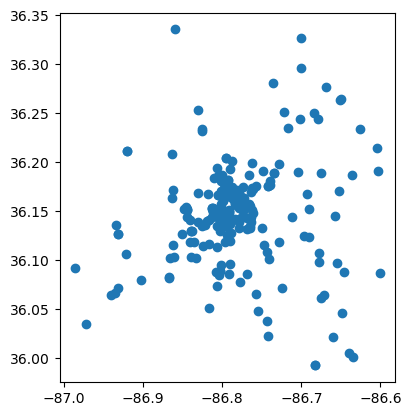

In [119]:
hist_marks.plot();

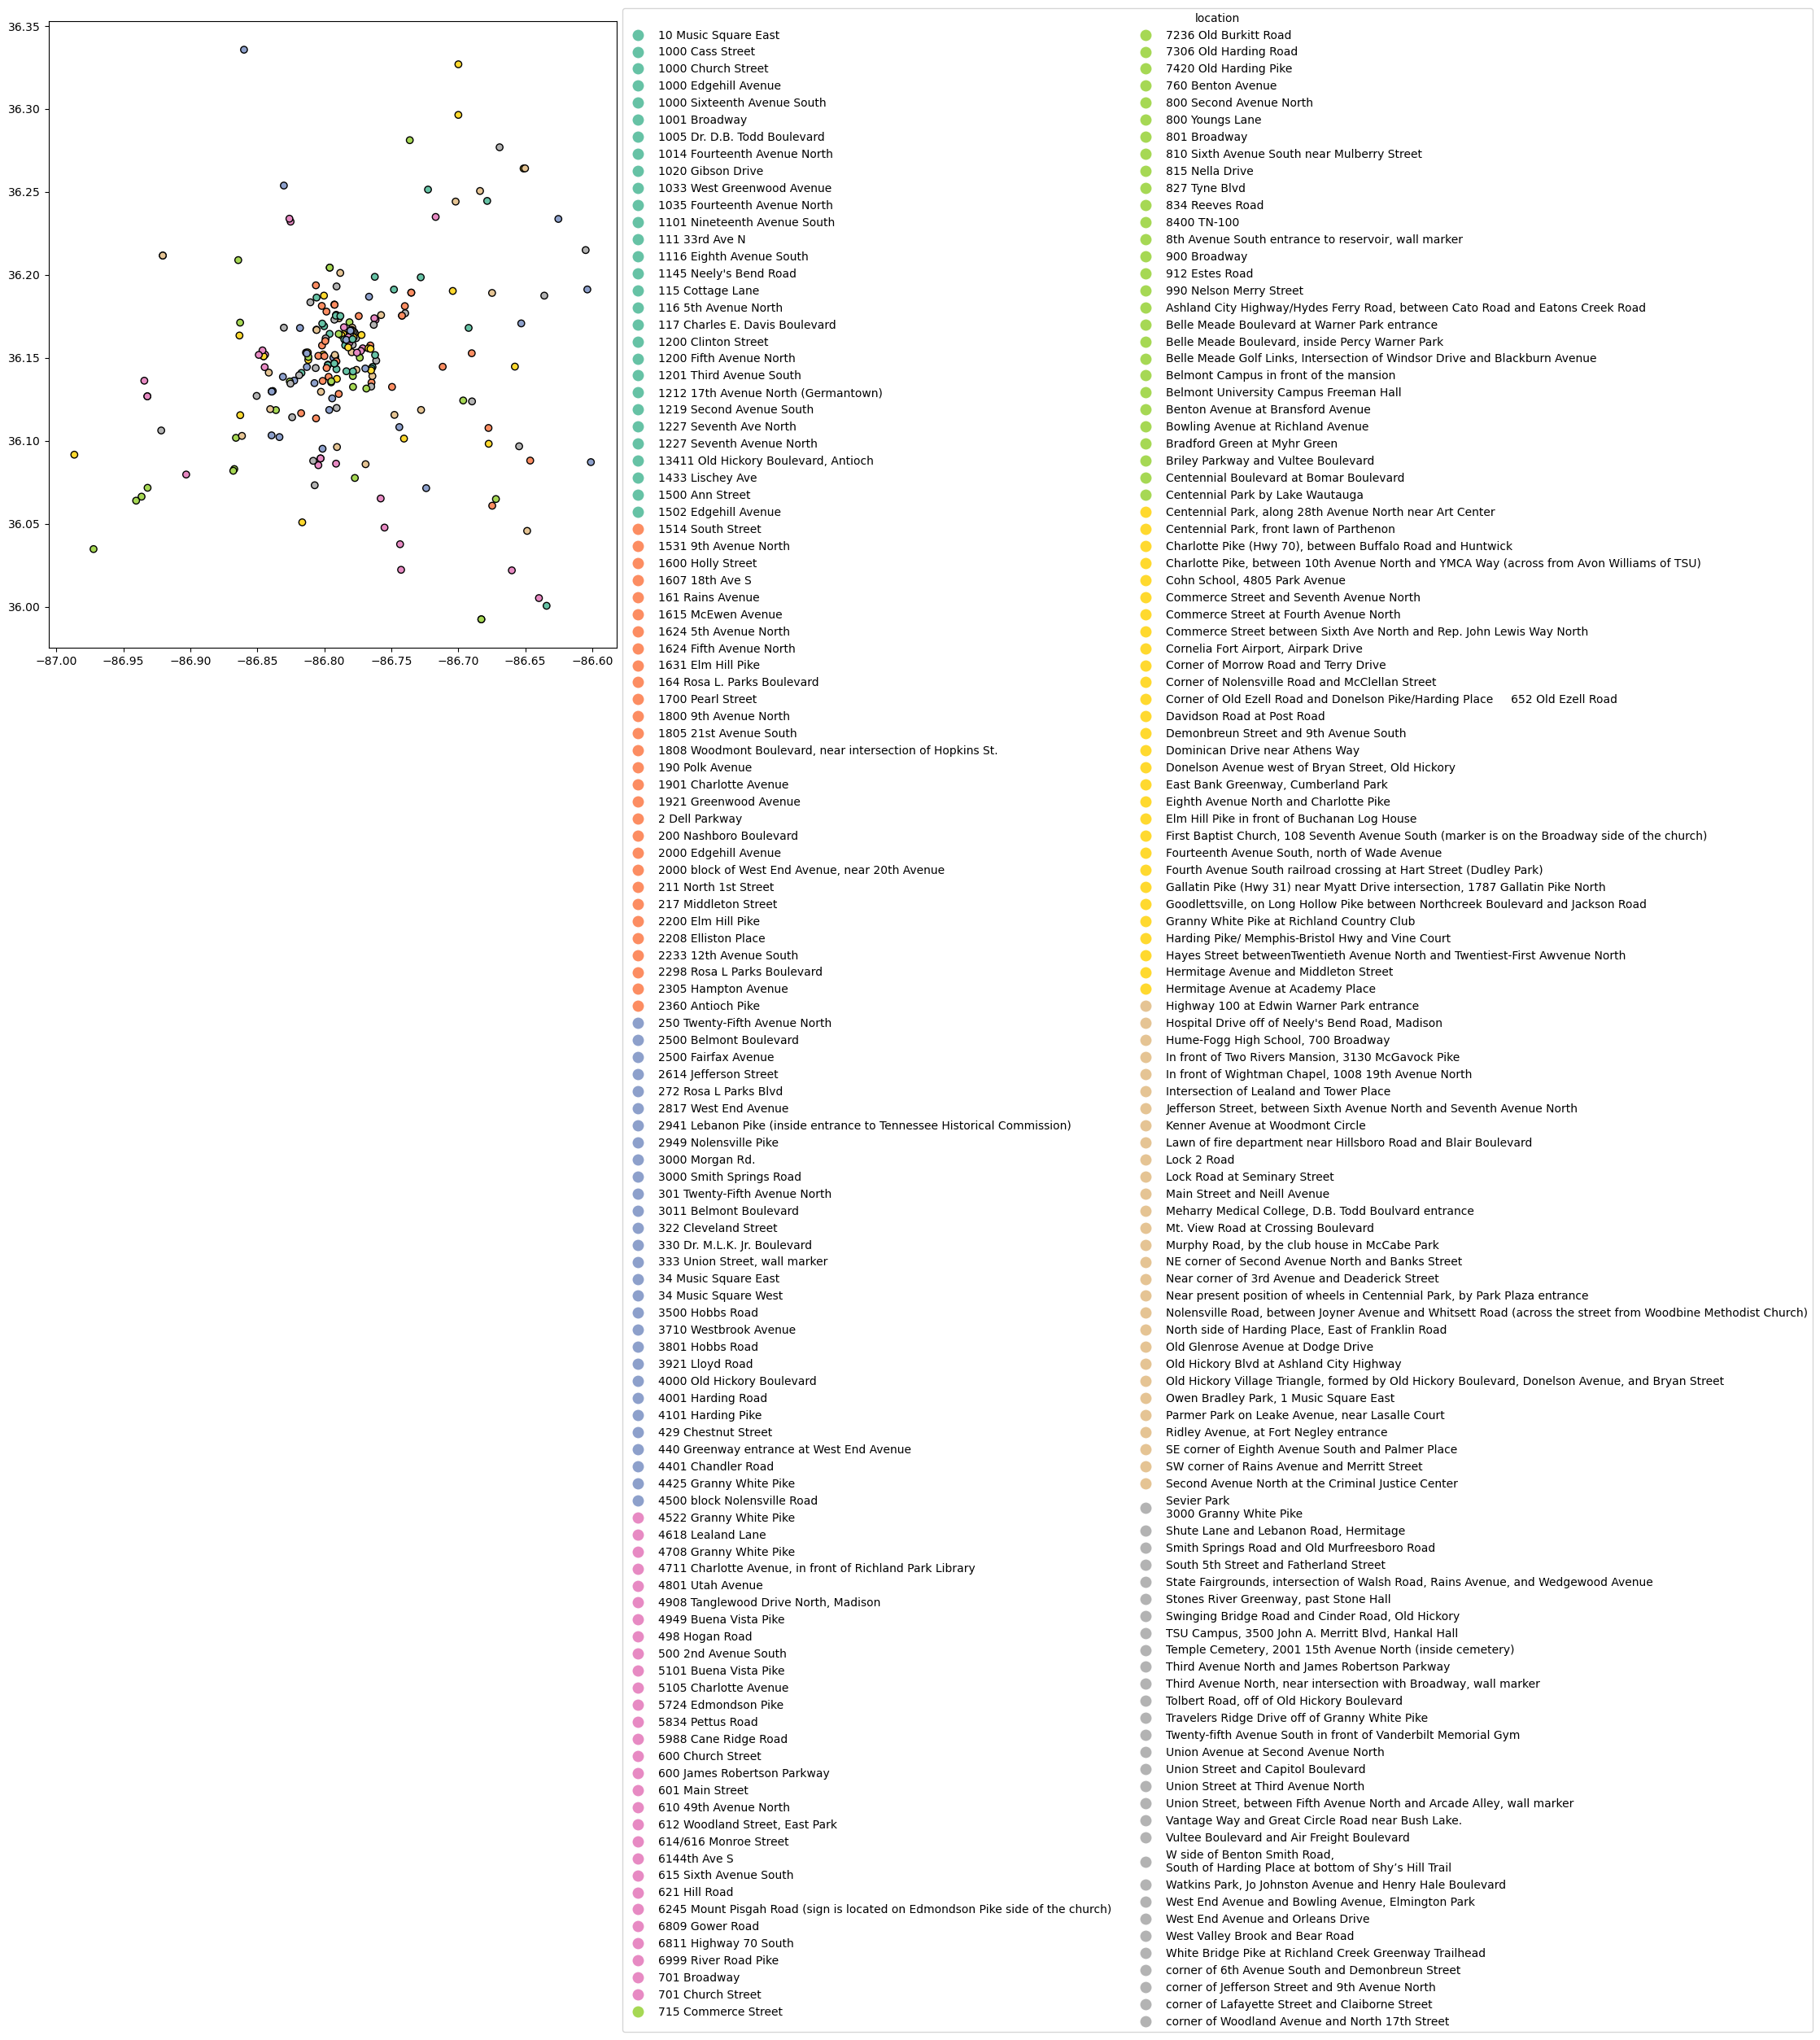

In [120]:
leg_kwds = {'title': 'location', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

hist_marks.plot(column = 'location', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [123]:
parks = gpd.read_file('../data/Metro Parks Boundaries (GIS).geojson')
print(parks.crs)
parks.head( )

EPSG:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [124]:
parks = gpd.sjoin(hist_marks, parks, op = 'within')

C:\Users\rober\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [125]:
hist_marks['year_erected'].value_counts()

year_erected
2019    28
2018    26
2020    18
1970    15
1971    12
2013    11
1968    11
2021    10
1975     9
2008     9
1969     9
1976     8
2003     7
1982     6
2022     6
2017     5
2005     4
2009     4
1996     4
1999     4
1981     4
1992     4
2011     4
1997     3
1995     3
2012     3
1990     3
2004     2
2016     2
2007     2
2001     2
1987     1
1978     1
2002     1
1994     1
1980     1
1993     1
2010     1
Name: count, dtype: int64

In [126]:
hist1914 = hist_marks.loc[hist_marks['year_erected']>'1944']
hist1914.shape

(245, 9)

In [127]:
polygon_hpark = hist_marks.loc[hist_marks['year_erected']>'1914']
polygon_hpark.shape

(245, 9)

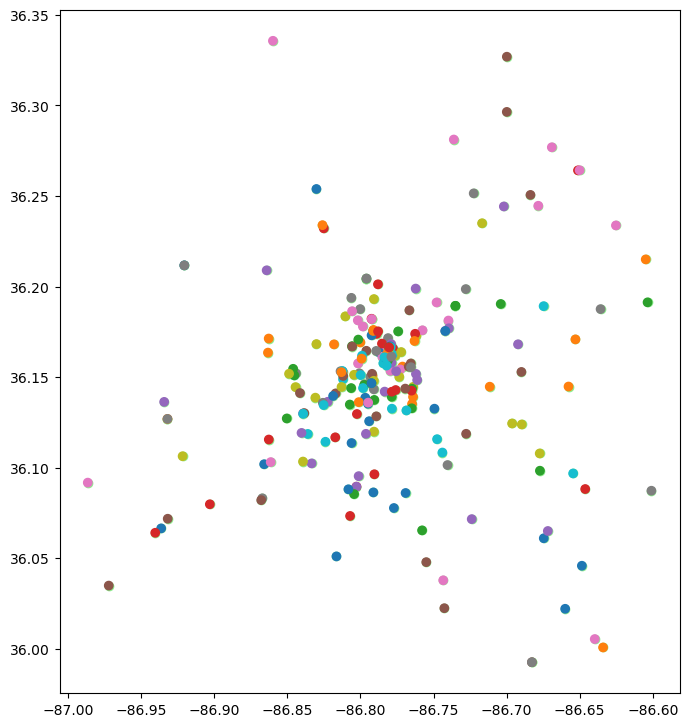

In [128]:
ax = polygon_hpark.plot(figsize = (8, 10), color = 'lightgreen')
hist1914.plot( ax = ax, column = 'marker_name');
plt.show();

In [129]:
polygon_hpark.geometry.centroid


C:\Users\rober\AppData\Local\Temp\ipykernel_33464\403634503.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_hpark.geometry.centroid


0      POINT (-86.78157 36.15930)
1      POINT (-86.86713 36.08306)
2      POINT (-86.78287 36.16376)
3      POINT (-86.70192 36.24422)
4      POINT (-86.65452 36.09678)
                  ...            
250    POINT (-86.78046 36.16641)
251    POINT (-86.81300 36.15272)
252    POINT (-86.74195 36.17548)
253    POINT (-86.80824 36.08803)
254    POINT (-86.62524 36.23376)
Length: 245, dtype: geometry

In [130]:
center = polygon_hpark.geometry.centroid[100]
print(center)

POINT (-86.6691 36.276917)


C:\Users\rober\AppData\Local\Temp\ipykernel_33464\2184390929.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_hpark.geometry.centroid[100]


In [131]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.276917, -86.6691]


In [132]:
#create our map of Nashville Zip Code 37207 and show it
map_hist = folium.Map(location =  area_center, zoom_start = 12)
map_hist

In [133]:
i = 0
for row_index, row_values in hist1914.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
number                                                          120
location                        Hume-Fogg High School, 700 Broadway
latitude                                                  36.159303
marker_name                               Randall Jarrell 1914-1965
marker_text       Distinguished poet, critic, novelist, and teac...
longitude                                                -86.781572
year_erected                                                   2005
civil_war_site                                                  NaN
geometry                               POINT (-86.781572 36.159303)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
number                                                           78
location              Belle Meade Boulevard at Warner Park entrance
latitude                                                  36.083058
marker_name                          Percy Warner Park 2058.1 Acres
marker_text     

In [138]:

map_hist = folium.Map(location =  area_center, zoom_start = 7)

folium.GeoJson(polygon_park).add_to(map_hist)



for row_index, row_values in hist1914.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['marker_name'])
    icon=folium.Icon(color="blue",icon="binoculars", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, 
        icon = icon) 

    marker.add_to(map_hist)
    
map_hist.save('../maps/map_hist.html')

map_hist